# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/nhorning/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


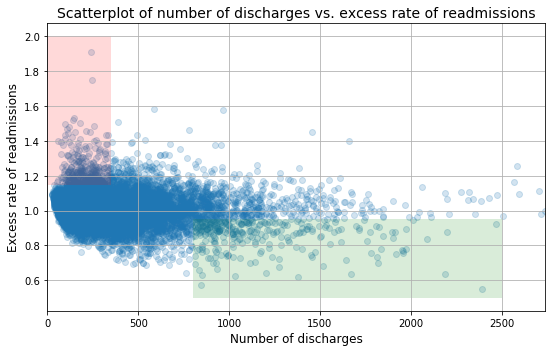

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? why or why not?

The recommendations and analysis don't appear to be correct.

#### Initial observations
 * While it does appear that there are more extreme values for excess rates of readmissions for both very low and very high number of discharges, the overall trend is not made clear by the scatterplot, and it's statistical significance is not shown.
 * The red and green shaded areas do not display a trend. They only show certain extreme values of the dataset. 
 * The shaded areas do not correspond to the subsequent statistics and appear to be arbitrarily chosen. 

#### Statistics
 * There is no rationale given for why only x values < 100 and > 1000 are being considered. This could suggest cherry picking.
 * It is not clear whether the difference in readmissions rates of the two extremes is statistically significant.
 * It is not clear what the relevance of percentage of hospitals that have readmissions rates greater or less the 1 is. 
 * It is not clear what the relative size of either of the areas being evaluated are. 

#### Conclusions
* The statement that there is a "significant" correlation is not supported by actual statistical analysis. There is no hypothesis test to indicate significance.
* While the assumption that smaller hospitals/facilities may be lacking necessary resources is a reasonable explanation for the more extreme values in the excess readmissions shown, it is not at all proven by the given data. For instance, another explanation, equally supported by the given data, is that better performing hospitals survive longer and become bigger.

#### Policy recommendations
* The definition of "Hospitals/facilities with small capacity" of < 300 appears to be arbitrarily chosen, and doesn't correspond to any other part of the analysis. 
* It appears from the scatterplot that the vast majority of hospitals have a number of discharges below 1000 and it could be below 500.  It may therefore be impractical to consolidate enough of them to match the desired discharge ranges.
* It is reasonable to suppose the process of implementing the policy recommendations could result in higher excess rates of readmissions than the status quo, due to factors including decreased rural coverage and excess travel times. This possibility is not addressed by the analysis, and likely cannot be addressed with the given data, but would need to be in order for the policy recommendation to be considered practical.


### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1. Set up an appropriate hypothesis test
Let's base the definition of "Hospitals/facilities with small capacity" on the median number of discharges, which we can find below is 281. 

Null hypothesis: Any difference between excess readmission between facilities with greater than 281 discharges and less than 281 discharges is due to random chance. 
$$H_0: \mu_{small} = \mu_{large}$$

Alternate hypothesis: The excess readmission rate is significantly greater for small hospitals than for large hospitals.
$$H_a: \mu_{small} > \mu_{large}$$

As the test is about a difference of means, and the population distributions are not know, the correct hypothesis test is the independent two sample t test
#### 2. Compute and report  the observed significance value  (or p-value)

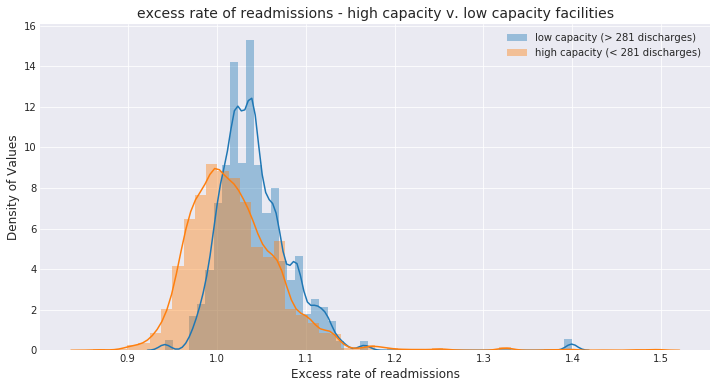

x = Sorted list of discharge numbers
Length x:	 11494
median x:	 281.0

no. low capacity:	 5748
no. high capacity:	 5746

Mean low capacity excess discharges:	 1.0432
Mean high capacity excess discharges:	 1.0198
Difference of mean excess discharges:	 0.0234

t statistic:	 25.51
p-value:	 8.91e-140


In [147]:
import numpy
from scipy import stats
#Hypothesis test:

#Get statistics: 

#turn lists inton np arrays to do math
npx = np.array(x)
npy = np.array(y)

#Caluculate median number of discharges
midx = np.median(npx)

#split number of discharges (x) in low and hi samples
lowx = npx[npx <= midx]
hix = npx[npx > midx]

#Find n for both
nlow = len(lowx)
nhi = len(hix)

#split excess discharge rates (y) into two samples that match low x and low y.
lowy = npy[lowx]
hiy = npy[hix]

#find difference of means
mulow = np.mean(lowy)
muhi = np.mean(hiy)
delta = mulow-muhi

#conduct two sample ind
t, p = stats.ttest_ind(lowy,hiy, equal_var=False)

#plot the distributions (why not?)
f, ax = plt.subplots(figsize=(12,6))

sns.distplot(lowy, label='low capacity (> 281 discharges)', ax=ax)
sns.distplot(hiy, ax=ax, label='high capacity (< 281 discharges)')

sns.set_style('darkgrid')
ax.set_xlabel('Excess rate of readmissions', fontsize=12)
ax.set_ylabel('Density of Values', fontsize=12)
ax.set_title('excess rate of readmissions - high capacity v. low capacity facilities', fontsize=14)
ax.legend()
#ax.grid(True)
fig.tight_layout()
plt.show()

#print stats
print('x = Sorted list of discharge numbers')
print('Length x:\t', len(npx))
print('median x:\t', midx)

print('\nno. low capacity:\t', nlow)
print('no. high capacity:\t', nhi)

print('\nMean low capacity excess discharges:\t', round(mulow,4))
print('Mean high capacity excess discharges:\t', round(muhi,4))
print('Difference of mean excess discharges:\t', round(delta,4))

print('\nt statistic:\t', round(t,2))
print('p-value:\t', round(p/2,142))

"Low capacity" hospitals in the sample do, in fact, have a greater mean ratio of excess discharges with a mean difference of approximately 0.0234 from the "high capacity" hospital. The one tailed p-value from the t-test is approximately $8.91 \times 10^{-140}$ which can be thought of as 0.891 with 140 more zero's between the decimal point and the 8.

#### 3. Report statistical significance for $\alpha$ = .01. 
The sample difference of means is statistically significant at $\alpha$ = 0.01. The null hypothesis is rejected. 

The observed difference would in fact be statistically significant at any practical alpha value. A computer simulating the null hypothesis one million times a second could easily outlast [all the stars and black holes in the universe](https://en.wikipedia.org/wiki/Graphical_timeline_from_Big_Bang_to_Heat_Death) before randomly producing a difference greater than that in the sample.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Statistical significance however, deals only with the chance the result is the outcome of random sampling error. With a large enough sample size, an arbitrarily small difference in means can be shown to statistically significant.  Practical significance puts results in terms of practical implications and how they might effect decision making. One way to do this is to *standardize* them. That is, put them in terms of the standard deviation of the sample.


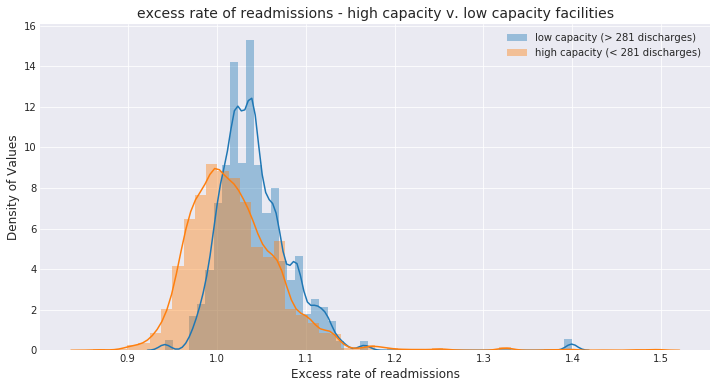

In [143]:
f, ax = plt.subplots(figsize=(12,6))

sns.distplot(lowy, label='low capacity (> 281 discharges)', ax=ax)
sns.distplot(hiy, ax=ax, label='high capacity (< 281 discharges)')

sns.set_style('darkgrid')
ax.set_xlabel('Excess rate of readmissions', fontsize=12)
ax.set_ylabel('Density of Values', fontsize=12)
ax.set_title('excess rate of readmissions - high capacity v. low capacity facilities', fontsize=14)
ax.legend()
#ax.grid(True)
fig.tight_layout()
plt.show()


In [79]:
#Put difference of means (delta) in terms of the pooled standard devation
standard_y = np.std(y)
standard_delta = delta/standard_y
print(round(standard_delta,2))

0.25


$\Delta = 0.25$, or the difference in means is .25 standard deviations, which is typically considered a small *effect size.*

Another way to put results in terms of practical significance is with correlation, which will be addressed in the next section.

#### 5. Look at the scatterplot above.

* What are the advantages and disadvantages of using this plot to convey information?

The scatter plot is good for identifying clear relationships between the variables on the axis.  When the relationship is not immediately clear it can be ambiguous.




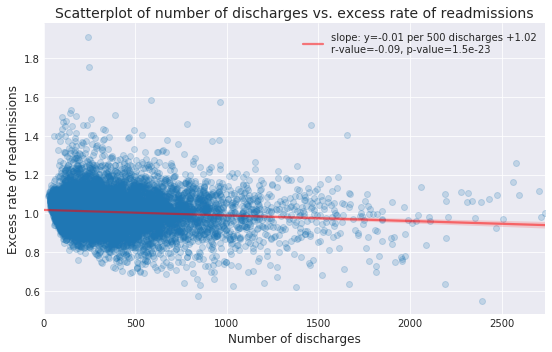

-0.09


In [145]:
import seaborn as sns


def rstr(x): #convenient function to round to 2 dec and convert to string for less typing
    return str(round(x,2))

#get linear regression stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(npx,npy)

#multiply slope by 2500 to make it readable at all
sl = slope*500

linestr = 'slope: y='+rstr(sl)+' per 500 discharges +'+rstr(intercept)+'\nr-value='+rstr(rvalue)+', p-value='+str(round(pvalue,24))

fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(npx, npy, scatter_kws={'alpha':0.2}, line_kws={'color':'red','alpha':0.5,'label':linestr}, ax=ax)

sns.set_style('darkgrid')
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.legend()
#ax.grid(True)
fig.tight_layout()
plt.show()


* Construct another plot that conveys the same information in a more direct manner.

The plot from above itself can be salvaged by adding a linear regression line. From the slope of the line we can see that there is in fact a downward trend in the data, but that trend is actually quite small. There is roughly a 0.01 drop in the rate of excess readmissions for every 500 discharges. While the low p-value of 1.5e-23 shows this is a statistically significant correlation, r-value of only ~0.09 implies that the level of correlation itself is negligible.

Unfortunately for the original policy recommendations, this indicates that the relationship between the two values is likely not practically significant enough to be actionable. 

